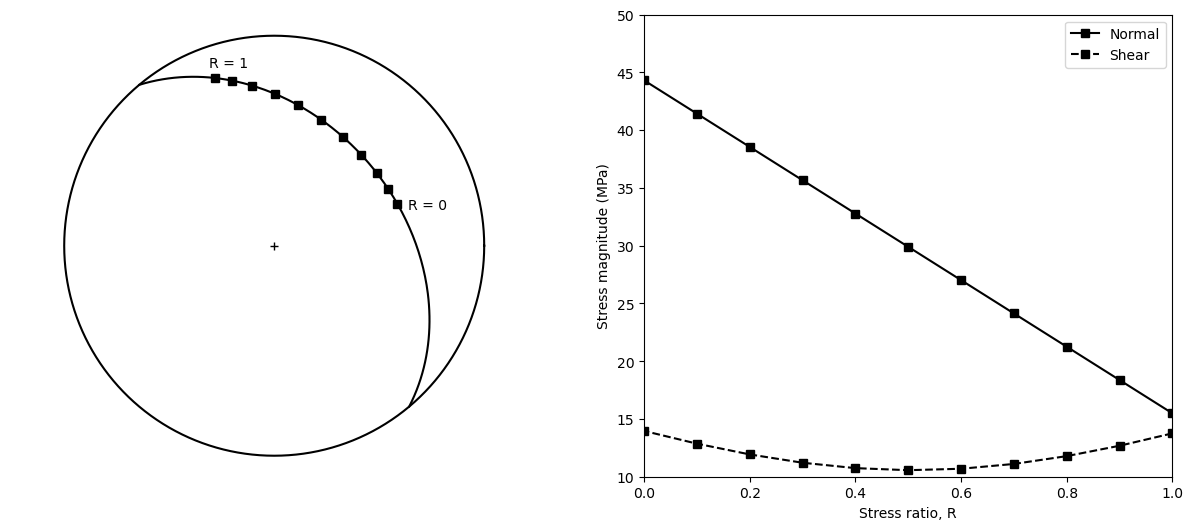

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Import functions
import sys, os
sys.path.append(os.path.abspath("../functions"))
from shear_on_plane import shear_on_plane
from great_circle import great_circle
from st_coord_line import st_coord_line

# Stress tensor in principal stress coordinate system
# start with R = 1, sigma2 = sigma3
stress = np.array([[50, 0, 0],[ 0, 10, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([325, 33, 66])

# Plane orientation
stk, dip = np.radians([320, 40])

# Number of R increments
rinc = 11

# sigma2 increment
sstep = (stress[0,0] - stress[2,2])/(rinc-1)

# Initialize array
nort = np.zeros(rinc) # normal tractions
sht = np.zeros(rinc) # max. shear traction
tsht = np.zeros(rinc) # trend max. shear traction
psht = np.zeros(rinc) # plunge max. shear traction
rval = np.zeros(rinc) # R value

# Compute normal and shear tractions for all Rs
for i in range(0,rinc):
    stress[1,1] = stress[2,2] + sstep*i
    # Compute normal and maximum shear tractions on plane
    tt,dctt,srat = shear_on_plane(stress,tx1,px1,
                                  tx3,stk,dip)
    # Extract values
    nort[i] = tt[0,0]
    sht[i] = tt[2,0]
    tsht[i] = tt[2,1]
    psht[i] = tt[2,2]
    rval[i] = srat

# Make a larger figure
fig, ax = plt.subplots(1,2,figsize=(15,6))
    
# Plot fault plane and max. shear tractions
# orientations in a lower hemisphere, equal 
# area stereonet

# Plot the primitive of the stereonet
r = 1; # unit radius
th = np.arange(0,361,1)*np.pi/180
x = r * np.cos(th)
y = r * np.sin(th)
ax[0].plot(x,y,"k")
# Plot center of circle
ax[0].plot(0,0,"k+")
# Make axes equal and remove them
ax[0].axis("equal")
ax[0].axis("off")
# Plot fault plane
path = great_circle(stk,dip,1)
ax[0].plot(path[:,0], path[:,1], "k") 
# Plot max. shear tractions orientations 
for i in range(0,rinc):
    x, y = st_coord_line(tsht[i],psht[i],1)
    ax[0].plot(x,y,"ks")
    if i == 0:
        ax[0].text(x-0.025, y+0.05, "R = 1")
    if i == rinc-1:
        ax[0].text(x+0.05, y-0.025, "R = 0")
    
# Plot normal and shear tractions versus R
ax[1].plot(rval,nort,"k-s", label="Normal")
ax[1].plot(rval,sht,"k--s", label="Shear")
ax[1].axis([0, 1, 10, 50])
ax[1].set_xlabel("Stress ratio, R")
ax[1].set_ylabel("Stress magnitude (MPa)")
ax[1].legend()
plt.show()

In [ ]:
# Run this cell if you want to save the figure
fig.savefig("shear_on_plane.png", dpi=300)